# Suicide Rates Overview

## Introduction

World Health Organization (WHO) states that "Close to 800,000 people die due to suicide every year, which is one person every 40 seconds". The suicide rate in lots of countries have been quite high for many years, including the developing and developed countries.
Suicide has been a global phenomenon and it is more common than we might think. 

The goal of this project is to analyze the differences of suicide rate among countries, gender groups and age groups, as well as to figure out if there are any factors that may be correlated with the suicide rate. Through this project, I hope to draw more poeple's attention to this serious global public health issue.

## Background

Previous study of suicide conducted by Szamil has shown that men are more prone to commit suicide than women and younger age groups tend to have lower suicide rate than older age groups, but the differences vary by countries.

According to [Suicide Awareness Voices of Education(SAVE)](https://save.org/about-suicide/suicide-facts/), suicide has become the 2nd leading cause of death in the world for those aged 15-24 years and the 4th leading cause of death for adults ages 18-65. It also shows the same gender disparities that suicide among males are 4 times higher than among females.

## Research questions
In order to better understand the distribution of the suicide rate identify specific groups at risk for suicide, I will be focusing on 3 research questions in this project:

1. How are the suicide rates distributed across different countries, gender groups and age groups?
2. What are the factors correlated with the suicide rate?
3. What is the trend of the suicide rate from 1985 to 2016? Is it increasing or decreasing? Are there any differences in changes over time among different countries, gender or age group?

I will be analyzing these problems globally and also focus specifically on the situation in the United States.





## Data and Methodology

### Data
The dataset used in this project is suicide rates overview 1985 to 2016 from Kaggle, which can be downloaded [here](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) or can be found in the [data](https://github.com/Shuya-Ma/data-512/tree/main/Suicide%20Rates%20Overview/data) folder. It was originally pulled from 4 other datasets listed in the references.. The dataset contains suicide-related data of 101 countries from 1985 to 2016, which provides essential information for understanding the scope of the problem.
The dataset contains incomplete data for year 2016 , so I exclude that year from my study.

The descriptions of column variables are listed below:
- Country 
- Year : 1985 - 2016
- sex : Male/Female
- age : age group (5-14, 15-24, 25-34, 35-54, 55-74, 75+)
- suicides_no : Number of suicides
- population : Number of all living people
- suicides/100k pop : suicide rate (per 100k population)
- country-year : country-year composite key
- HDI for year : Human development index of each country at given year
- gdp_for_year : GDP of each country at given year
- gdp_per_capita : GDP per capita of each country at given year

### Methodology
The major methodology used in this project is EDA and visualization, as it is a clear and straightforward method to answer most of the research questions, and I also applied a correlation matrix to investigate the factors correlated with the suicide rate


## Findings

In [1]:
# set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Let's first load the data

In [2]:
# load data
suicide =  pd.read_csv('data/master.csv', header = 0)
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Let's print out the suicide counts by year

In [3]:
# suicide counts by year
suicide = suicide.replace("5-14 years", "05-14 years")
suicide_year = suicide.groupby(by=["year"])["suicides_no"].sum().reset_index()
suicide_year

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


We can see that 2016 has a significant drop in the suicide count. This could due to not enough data for the last year. Therefore, I decide to drop the data of 2016.

In [4]:
# drop year 2016
suicide = suicide[suicide.year != 2016]

## Question 1: How are the suicide rates distributed across different countries, gender groups and age groups?

## Global

### Country

Let's first obseve the suicide rate of each countries.

,country,suicide_rate
52,Lithuania,41.464101
74,Russian Federation,32.777207
86,Sri Lanka,30.483939
11,Belarus,30.344685
40,Hungary,30.022407
...,...,...
1,Antigua and Barbuda,0.552700
45,Jamaica,0.466037
64,Oman,0.367194
27,Dominica,0.000000


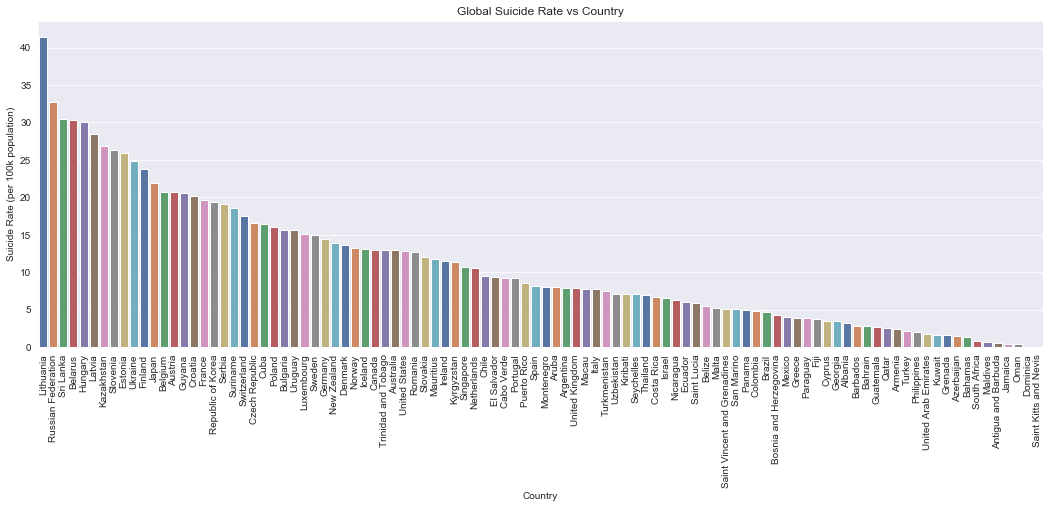

In [5]:
# suicide rate by country
suicide_rate_country =(suicide.groupby(by=["country"])["suicides_no"].sum()*100000/ suicide.groupby(by=["country"])["population"].sum()).reset_index()
suicide_rate_country.columns = ['country', 'suicide_rate']
suicide_rate_country = suicide_rate_country.sort_values(by='suicide_rate', ascending=False)

display(suicide_rate_country)

# plot the rates
sns.set_style("darkgrid")
plt.figure(figsize=(18,6))
plot = sns.barplot(y='suicide_rate', x='country', data=suicide_rate_country, palette="deep")
plt.xlabel('Country')
# plt.yticks(fontsize=5)
plt.xticks(rotation=90)
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Country')
plt.savefig('plot/global_country_rate.png', bbox_inches='tight')

We can clearly see that the suicide rate varies a lot among different countries.

Since they are more than 100 countries, let’s take a look at the top 20 and bottom 20.


,country,suicide_rate
52,Lithuania,41.464101
74,Russian Federation,32.777207
86,Sri Lanka,30.483939
11,Belarus,30.344685
40,Hungary,30.022407
51,Latvia,28.471011
47,Kazakhstan,26.898614
83,Slovenia,26.360477
30,Estonia,25.964525
94,Ukraine,24.870398


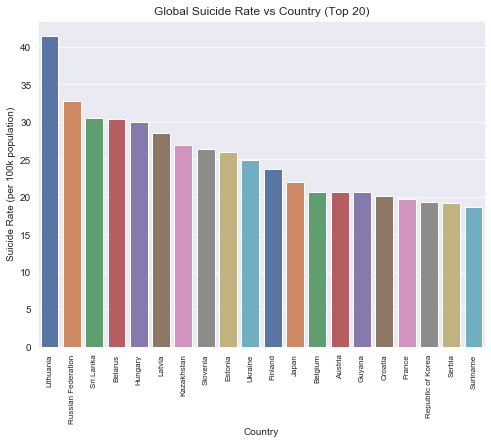

In [6]:
# Top 20 countries (suicide rate) 
suicide_rate_country_top = suicide_rate_country[:20]

display(suicide_rate_country_top)

plt.figure(figsize=(8,6))
plot = sns.barplot(y='suicide_rate', x='country', data=suicide_rate_country_top, palette="deep")
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Country (Top 20)')
plt.savefig('plot/global_country_rate_top.png', bbox_inches='tight')

,country,suicide_rate
52,Lithuania,41.464101
74,Russian Federation,32.777207
86,Sri Lanka,30.483939
11,Belarus,30.344685
40,Hungary,30.022407
...,...,...
1,Antigua and Barbuda,0.552700
45,Jamaica,0.466037
64,Oman,0.367194
27,Dominica,0.000000


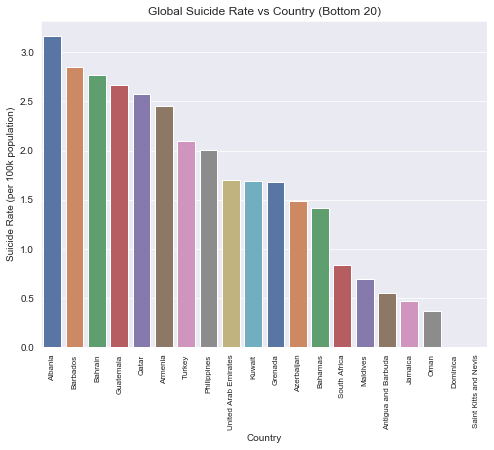

In [7]:
# Bottom 20 countries (suicide rate) 

suicide_rate_country_bottom = suicide_rate_country[-20:]

display(suicide_rate_country)

plt.figure(figsize=(8,6))
plot = sns.barplot(y='suicide_rate', x='country', data=suicide_rate_country_bottom, palette="deep")
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Country (Bottom 20)')
plt.savefig('plot/global_country_rate_bottom.png', bbox_inches='tight')

As can be seen that the suicide rate can be as high as more than 40 per 100 thousand population, while the lowest one is less than 0.5.


### Gender

Then, let’s see the distribution of suicide rate across genders.

,sex,suicide_rate
0,female,5.937727
1,male,20.719972


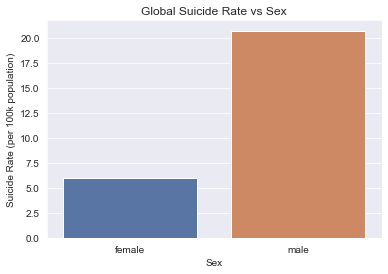

In [8]:
suicide_rate_sex =(suicide.groupby(by=["sex"])["suicides_no"].sum()*100000/ suicide.groupby(by=["sex"])["population"].sum()).reset_index()
suicide_rate_sex.columns = ['sex', 'suicide_rate']

display(suicide_rate_sex)

plot = sns.barplot(x='sex', y='suicide_rate', data=suicide_rate_sex, palette="deep")
plt.xlabel('Sex')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Sex')
plt.savefig('plot/global_sex_rate.png', bbox_inches='tight')

From the bar chart, we can see that the suicide rate of male is much higher than that of female, which is nearly three times higher than of female.

### Age

Now, let’s see the distribution of suicide rate across different age groups:
- 5 - 14 years
- 15 - 24 years
- 25 - 34 years
- 35 - 54 years
- 55 - 74 years
- 75+ years

,age,suicide_rate
0,05-14 years,0.622287
1,15-24 years,9.363095
2,25-34 years,13.330724
3,35-54 years,17.073403
4,55-74 years,18.854152
5,75+ years,24.543314


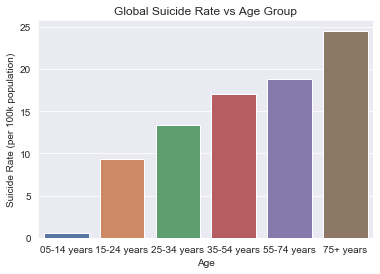

In [9]:
suicide_rate_age =(suicide.groupby(by=["age"])["suicides_no"].sum()*100000/ suicide.groupby(by=["age"])["population"].sum()).reset_index()
suicide_rate_age.columns = ['age', 'suicide_rate']

display(suicide_rate_age)

plot = sns.barplot(x='age', y='suicide_rate', data=suicide_rate_age, palette="deep")
plt.xlabel('Age')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Age Group')
plt.savefig('plot/global_age_rate.png', bbox_inches='tight')

 We can see that the higher the age group is, the higher the suicide rate is.


## US

In [10]:
suicide_us = suicide.loc[suicide['country'] == 'United States']


In [11]:
suicide_us

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,"18,120,714,000,000",60387,Silent
27218,United States,2015,male,05-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z


### Gender

,sex,suicide_rate
0,female,5.197197
1,male,20.815927


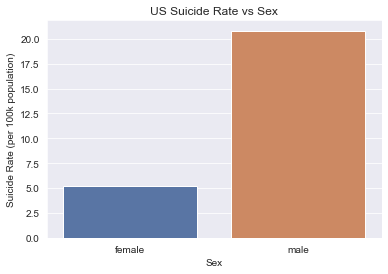

In [12]:
suicide_rate_sex_us =(suicide_us.groupby(by=["sex"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["sex"])["population"].sum()).reset_index()
suicide_rate_sex_us.columns = ['sex', 'suicide_rate']

display(suicide_rate_sex_us)

plot = sns.barplot(x='sex', y='suicide_rate', data=suicide_rate_sex_us, palette="deep")
plt.xlabel('Sex')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Sex')
plt.savefig('plot/us_sex_rate.png', bbox_inches='tight')

For the situation in the united states, we can see a similiar pettern as the global situation: the suicide rate of male is nearly three times higher than that of female. 

### Age

,age,suicide_rate
0,05-14 years,0.740195
1,15-24 years,11.440654
2,25-34 years,14.248856
3,35-54 years,16.061758
4,55-74 years,15.388197
5,75+ years,19.124520


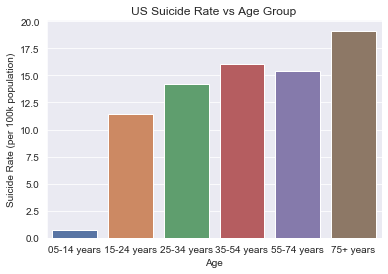

In [13]:
suicide_rate_age_us =(suicide_us.groupby(by=["age"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["age"])["population"].sum()).reset_index()
suicide_rate_age_us.columns = ['age', 'suicide_rate']

display(suicide_rate_age_us)

plot = sns.barplot(x='age', y='suicide_rate', data=suicide_rate_age_us, palette="deep")
plt.xlabel('Age')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Age Group')
plt.savefig('plot/us_age_rate.png', bbox_inches='tight')

 The suicide rates of different age groups in the united states show the same patterns as the global population that the suicide rate increases with age.

## Question 2: What are the factors correlated with the suicide rate?

Let's calculate the correlation matrix to see which factors are correlated with the suicide rate.

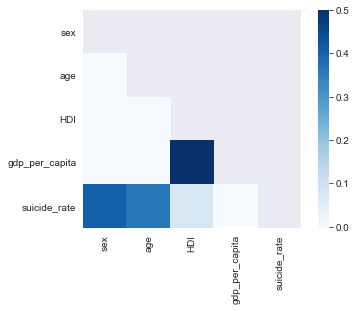

In [14]:
suicide_corr = suicide[["sex", "age", "HDI for year", "gdp_per_capita ($)", "suicides/100k pop"]]
suicide_corr.columns = ['sex', 'age', 'HDI', 'gdp_per_capita', 'suicide_rate']
suicide_corr = suicide_corr.dropna()

# encode variable sex and age
suicide_corr = suicide_corr.replace("male", 1)
suicide_corr = suicide_corr.replace("female", 0)

suicide_corr = suicide_corr.replace("05-14 years", 0)
suicide_corr = suicide_corr.replace("15-24 years", 1)
suicide_corr = suicide_corr.replace("25-34 years", 2)
suicide_corr = suicide_corr.replace("35-54 years", 3)
suicide_corr = suicide_corr.replace("55-74 years", 4)
suicide_corr = suicide_corr.replace("75+ years", 5)

corr = suicide_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plot = sns.heatmap(corr, cmap="Blues", mask=mask, vmax=.5, square=True)
plt.savefig('plot/corr_matrix.png', bbox_inches='tight')

From the graph, we can see sex and age shows a moderate to strong correlation with the suicide rate, and HDI shows a relatively weak to moderate correlation with the suicide rate, while surprisingly GDP per capita does not really show a correlation with the suicide rate.

## Question 3: What is the trend of the suicide rate from 1985 to 2016? Is it increasing or decreasing? Are there any differences in changes over time among different countries, gender or age group?



## Global

Now, let's see the changes in the suicide rate over time for the global population

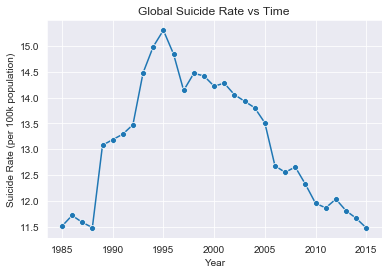

In [15]:
suicide_rate_year = (suicide.groupby(by=["year"])["suicides_no"].sum()*100000/ suicide.groupby(by=["year"])["population"].sum()).reset_index()
suicide_rate_year.columns = ['year', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', data=suicide_rate_year, palette="dark", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Time')
plt.savefig('plot/global_year_rate.png', bbox_inches='tight')

From the plot, we can observe that the rate reaches its peak in the year 1995 and we are glad to see a gradual decline in the next 20 years after that from 1995 to 2015.

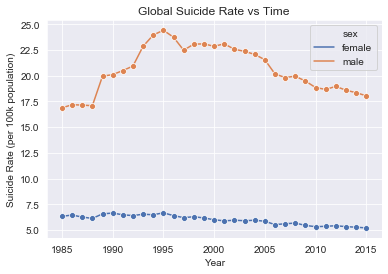

In [16]:
suicide_rate_year_sex =(suicide.groupby(by=["year", "sex"])["suicides_no"].sum()*100000/ suicide.groupby(by=["year", "sex"])["population"].sum()).reset_index()
suicide_rate_year_sex.columns = ['year', 'sex', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', hue='sex', data=suicide_rate_year_sex, palette="deep", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Time')
plt.savefig('plot/global_year_rate_sex.png', bbox_inches='tight')

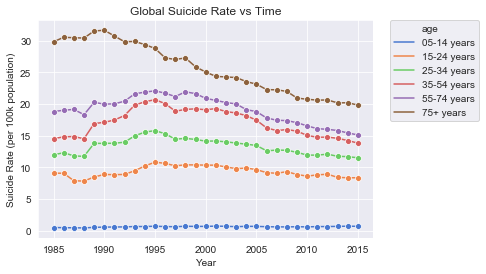

In [17]:
suicide_rate_year_age =(suicide.groupby(by=["year", "age"])["suicides_no"].sum()*100000/ suicide.groupby(by=["year", "age"])["population"].sum()).reset_index()
suicide_rate_year_age.columns = ['year', 'age', 'suicide_rate']

plot = sns.lineplot(x='year', y='suicide_rate', hue='age', data=suicide_rate_year_age, palette="muted", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Time')
plt.savefig('plot/global_year_rate_age.png', bbox_inches='tight')

From the above two plots, we can se that the changing patterns are similar among different gender and age groups.

## US

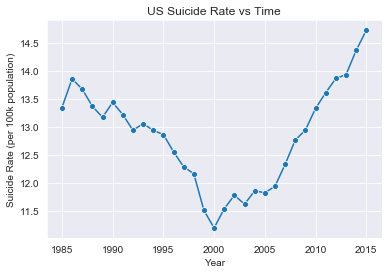

In [18]:
suicide_rate_year_us =(suicide_us.groupby(by=["year"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["year"])["population"].sum()).reset_index()
suicide_rate_year_us.columns = ['year', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', data=suicide_rate_year_us, palette="dark", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Time')
plt.savefig('plot/us_year_rate.png', bbox_inches='tight')

For the united states, the result is quite different from the global population.

The decrease from 1985 to 2000 and reach the lowest at the year 2000 and keep increasing after that from 2000 to 2015.


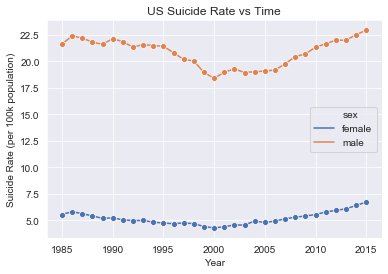

In [19]:
suicide_rate_year_sex_us =(suicide_us.groupby(by=["year", "sex"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["year", "sex"])["population"].sum()).reset_index()
suicide_rate_year_sex_us.columns = ['year', 'sex', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', hue='sex', data=suicide_rate_year_sex_us, palette="deep", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Time')
plt.savefig('plot/us_year_rate_sex.png', bbox_inches='tight')

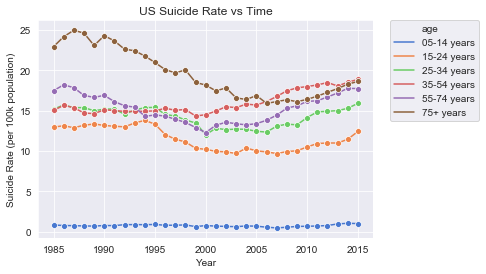

In [20]:
suicide_rate_year_age_us =(suicide_us.groupby(by=["year", "age"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["year", "age"])["population"].sum()).reset_index()
suicide_rate_year_age_us.columns = ['year', 'age', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', hue='age', data=suicide_rate_year_age_us, palette="muted", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Time')
plt.savefig('plot/us_year_rate_age.png', bbox_inches='tight')

The same changes happen among different gender and age groups.

## Limitations and Implications

The data we have is from 1985 to2 016 (incomplete data for year 2016), missing the recent few years. The future work could include the data from the lastest years to study the most recent trend of the suicide rate.

## Conclusion

In conclusion, suicide is correlated with gender, age and HDI (Human Development Index). Suicide rate of male is three times higher than of female and suicide rate increases with age. Also, it is glad to see a decline in the suicide rate of the global population, however, in the united states, there is an increase in the past 15 to 20 years, which deserves our great attention. Suicide is a global
public health issue and urgent actions and efforts are crucially needed to ensure that the tragedy of suicide does not continue to cost lives and affect many millions of people through the loss of loved ones or suicide attempts.



## References

Szamil. (2017). Suicide in the Twenty-First Century. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

National Institute of Mental Health. (2020). Suicide. Retrieved from https://www.nimh.nih.gov/health/statistics/suicide.shtml

Suicide Awareness Voices of Education. (2020). Suicide Statistics and Facts. Retrieved from https://save.org/about-suicide/suicide-facts/

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/ 

data:

Rusty. (2018). Suicide Rates Overview 1985 to 2016. Retrieved from https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

Szamil. (2017). Suicide in the Twenty-First Century. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/ 